In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(12345)


In [53]:
def AppendixVI(n,factor=['A','n','A','A2','A3','c4','1/c4','B3','B4','B5','B6','d2','1/d2','d3','D1','D2','D3','D4'][-4]):
    #Note that appendix AppendixVI is based on 0.997 confidence level (i.e. z_zalpha_2`~2.97)'
    '''
    Just an alternative for looking up the table
    n: sample size
    factor: factor to be checked at n 
    '''
    AppendixVI=pd.read_csv('AppendixVI.csv',index_col='n')
    return AppendixVI[factor][n]

In [54]:
df=pd.read_csv("table71.csv",header=0) #Example 7.1 from Montgomery
n=50 #given sample size
df

,sample_index,num_defectives
0,1,12
1,2,15
2,3,8
3,4,10
4,5,4
5,6,7
6,7,16
7,8,9
8,9,14
9,10,10


In [55]:
df['p']=df['num_defectives']/n
df

,sample_index,num_defectives,p
0,1,12,0.24
1,2,15,0.30
2,3,8,0.16
3,4,10,0.20
4,5,4,0.08
5,6,7,0.14
6,7,16,0.32
7,8,9,0.18
8,9,14,0.28
9,10,10,0.20


In [56]:
p_bar=df['p'].mean()
CL_p=p_bar
UCL_p=p_bar+3*np.sqrt(p_bar*(1-p_bar)/n)
LCL_p=p_bar-3*np.sqrt(p_bar*(1-p_bar)/n)
print(UCL_p,CL_p,LCL_p)


0.41023911859473844 0.23133333333333334 0.05242754807192823


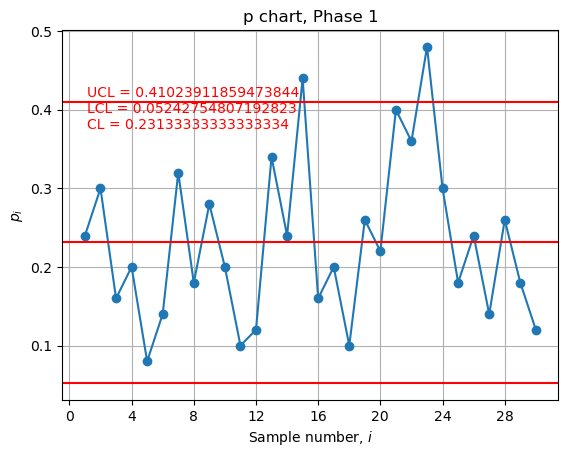

In [57]:
ax = plt.figure().gca()
ax.plot(df['sample_index'],df['p'],marker="o")
ax.axhline(y = UCL_p, color = 'r', linestyle = '-')
ax.axhline(y = LCL_p, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_p, LCL_p, CL_p),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_p, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('p chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$p_i$')

plt.show()


In [58]:
UCL_p

0.41023911859473844

In [59]:
Mask_to_remove_1=(df['p'].ge(UCL_p) | df['p'].le(LCL_p))

In [60]:
df=pd.read_csv("table71.csv",header=0)
df['p']=df['num_defectives']/n
df.iloc[Mask_to_remove_1,:]=np.nan ##### This is the only difference from the previous part
p_bar=df['p'].mean()
CL_p=p_bar
UCL_p=p_bar+3*np.sqrt(p_bar*(1-p_bar)/n)
LCL_p=p_bar-3*np.sqrt(p_bar*(1-p_bar)/n)
print(UCL_p,CL_p,LCL_p)


0.38929716004571047 0.21500000000000002 0.04070283995428958


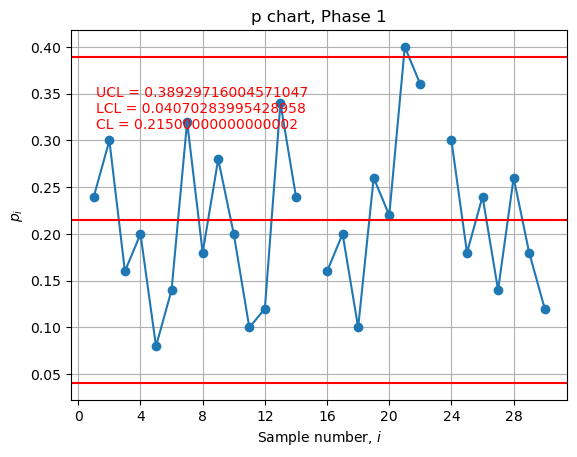

In [61]:
ax = plt.figure().gca()
ax.plot(df['sample_index'],df['p'],marker="o")
ax.axhline(y = UCL_p, color = 'r', linestyle = '-')
ax.axhline(y = LCL_p, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_p, LCL_p, CL_p),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_p, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('p chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$p_i$')

plt.show()

In [62]:
Mask_to_remove_2=(df['p'].ge(UCL_p) | df['p'].le(LCL_p)) # This is similar to the XS chart
Mask_to_remove_21=[Mask_to_remove_1[i] or Mask_to_remove_2[i] for i in range(len(Mask_to_remove_1))]

In [63]:
df=pd.read_csv("table71.csv",header=0)
df['p']=df['num_defectives']/n
df.iloc[Mask_to_remove_21,:]=np.nan # Remove the points that are out of control limits
p_bar=df['p'].mean()
CL_p=p_bar
UCL_p=p_bar+3*np.sqrt(p_bar*(1-p_bar)/n)
LCL_p=p_bar-3*np.sqrt(p_bar*(1-p_bar)/n)
print(UCL_p,CL_p,LCL_p)


0.3803923044574873 0.20814814814814817 0.035903991838809046


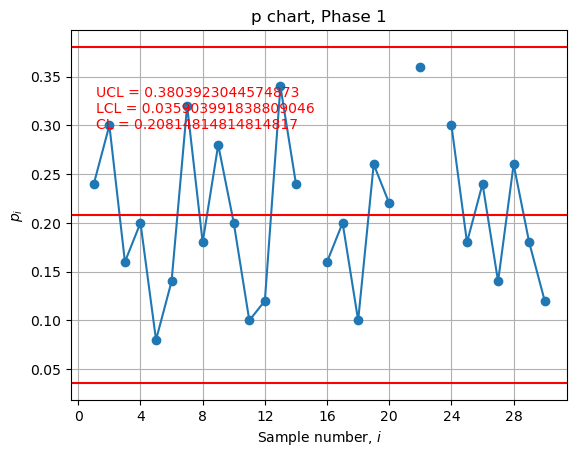

In [64]:
ax = plt.figure().gca()
ax.plot(df['sample_index'],df['p'],marker="o")
ax.axhline(y = UCL_p, color = 'r', linestyle = '-')
ax.axhline(y = LCL_p, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_p, LCL_p, CL_p),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_p, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('p chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$p_i$')

plt.show()